In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 3. Градиентный бустинг

Here we will work with widely known Human Actividy Recognition (HAR) dataset. Data is available at [UCI repository](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones). Download it and place in `data/` folder in the same directory as this notebook. There are available both raw and preprocessed datasets. This time we will use the preprocessed one.

Today we will work with LightGBM by Microsoft. [Link to github](https://github.com/Microsoft/LightGBM). It is one of the most popular frameworks these days that shows both great quality and performance.

There are another great frameworks (listed below). However, we will stick to `LightGBM` for this task.
* xgboost by dlmc. [Link to github](https://github.com/dmlc/xgboost). The most famous framework which got very popular on kaggle.
* Catboost by Yandex. [Link to github](https://github.com/catboost/catboost). Novel framework by Yandex company tuned to deal well with categorical features.

Some simple preprocessing is done for you. 

Your __ultimate target is to get familiar with one of the frameworks above__ and achieve at least 90% accuracy on test dataset.

In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [0]:
import numpy as np
X_train = np.genfromtxt('/content/drive/My Drive/Datasets/UCI HAR Dataset/train/X_train.txt')
y_train = np.genfromtxt('/content/drive/My Drive/Datasets/UCI HAR Dataset/train/y_train.txt')

X_test = np.genfromtxt('/content/drive/My Drive/Datasets/UCI HAR Dataset/test/X_test.txt')
y_test = np.genfromtxt('/content/drive/My Drive/Datasets/UCI HAR Dataset/test/y_test.txt')

with open('/content/drive/My Drive/Datasets/UCI HAR Dataset/activity_labels.txt', 'r') as iofile:
    activity_labels = iofile.readlines()

activity_labels = [x.replace('\n', '').split(' ') for x in activity_labels]
activity_labels = dict([(int(x[0]), x[1]) for x in activity_labels])

In [7]:
activity_labels

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

In [8]:
print(X_train.shape)
data_mean = X_train.mean(axis=0)
data_std = X_train.std(axis=0)

X_train = (X_train - data_mean)/data_std
X_test = (X_test - data_mean)/data_std

(7352, 561)


The dataset has some duplicating features. File `unique_columns.txt` stores the indices of the unique ones. 

In [9]:
! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic/homeworks/Lab1_Ensembles_and_SVM/unique_columns.txt

--2019-12-02 05:23:24--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic/homeworks/Lab1_Ensembles_and_SVM/unique_columns.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2049 (2.0K) [text/plain]
Saving to: ‘unique_columns.txt’

unique_columns.txt  100%[===================>]   2.00K  --.-KB/s    in 0s      

2019-12-02 05:23:24 (42.8 MB/s) - ‘unique_columns.txt’ saved [2049/2049]



In [0]:
unique_columns = np.genfromtxt('unique_columns.txt', delimiter=',').astype(int)
X_train_unique = X_train[:, unique_columns]
X_test_unique = X_test[:, unique_columns]

PCA could be useful in this case. E.g.

In [0]:
pca = PCA(0.99)

In [0]:
X_train_pca = pca.fit_transform(X_train_unique)
X_test_pca = pca.transform(X_test_unique)

In [13]:
X_train_pca.shape

(7352, 179)

In [14]:
X_test_pca.shape

(2947, 179)

Text(0, 0.5, 'Principal component 2')

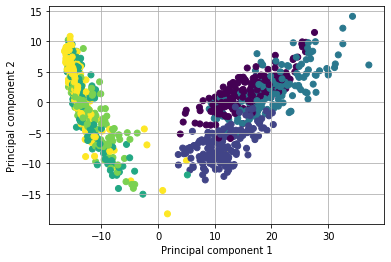

In [15]:
plt.scatter(X_train_pca[:1000, 0], X_train_pca[:1000, 1], c=y_train[:1000])
plt.grid()
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

Text(0, 0.5, 'Principal component 5')

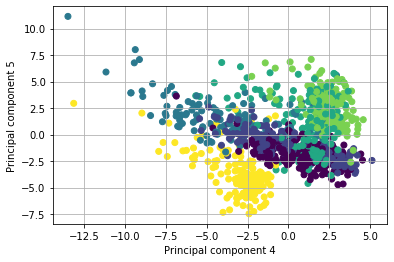

In [16]:
plt.scatter(X_train_pca[:1000, 3], X_train_pca[:1000, 4], c=y_train[:1000])
plt.grid()
plt.xlabel('Principal component 4')
plt.ylabel('Principal component 5')

Despite optimal parameters (e.g. for xgboost) can be found on the web, we still want you to use grid/random search (or any other approach) to approximate them by yourself.

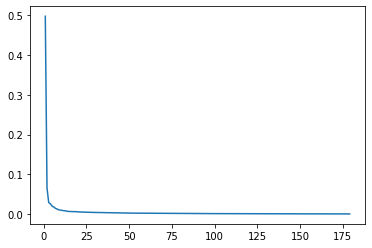

In [17]:
# Your code here.

### Example: https://rpubs.com/burakh/har_xgb

#Let's have a look at PCA variance

plt.plot(np.linspace(1, 179, num=179), pca.explained_variance_ratio_)

Text(0, 0.5, 'Principal component 7')

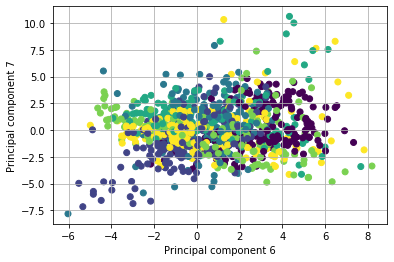

In [18]:
#6th and 7th components
plt.scatter(X_train_pca[:1000, 5], X_train_pca[:1000, 6], c=y_train[:1000])
plt.grid()
plt.xlabel('Principal component 6')
plt.ylabel('Principal component 7')


In [19]:
# So now we can see that only first 5 components is most userful
# but we will take all features for bettter accuracy
X_train_fin = X_train_pca#[:, :20]
X_test_fin = X_test_pca#[:, :20]
print(X_train_fin.shape, X_test_fin.shape)
#print(X_train_fin[100])

(7352, 179) (2947, 179)


In [50]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

#GridSearch our model
params_to_grid = {
    'objective':['multiclass'],
    'num_leaves': [8, 10, 12],
    'reg_lambda': [1],
    'boosting_type':['gbdt'],
    'max_depth':[-1],
    'n_estimators':[1000],
    'colsample_bytree' : [0.3, 0.2],
    'subsample' : [0.7],
}


mdl = lgb.LGBMClassifier()
gs = GridSearchCV(estimator=mdl, param_grid=params_to_grid)
gs.fit(X_train_fin, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.

In [51]:
gs.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.2,
 'max_depth': -1,
 'n_estimators': 1000,
 'num_leaves': 10,
 'objective': 'multiclass',
 'reg_lambda': 1,
 'subsample': 0.7}

In [53]:
#Final model
my_mdl = lgb.LGBMClassifier(max_depth=-1, 
                            objective='multiclass',
                            boosting_type='gbdt', 
                            #learning_rate=0.005, 
                            n_estimators=1000, 
                            num_leaves=10, 
                            colsample_bytree=0.2,
                            subsample = 0.7,
                            #num_iterations = 6000,
                            reg_lambda=1)
my_mdl.fit(X_train_fin, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=10,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=1, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)

In [54]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
#Final metrics
print("#########Train############")

print("f1_score_macro = ", f1_score(y_train, my_mdl.predict(X_train_fin), average='macro'))
print("accuracy = ", accuracy_score(y_train, my_mdl.predict(X_train_fin)))

print("#########Test#############")
print("f1_score_macro = ", f1_score(y_test, my_mdl.predict(X_test_fin), average='macro'))
print("accuracy = ", accuracy_score(y_test, my_mdl.predict(X_test_fin)))

#########Train############
f1_score_macro =  1.0
accuracy =  1.0
#########Test#############
f1_score_macro =  0.9390514814388956
accuracy =  0.9406175771971497


# Conclusion
*Заключение писалось сразу по ходу обучения*

* При первом прогоне GridSearch'a выяснилось, что когда мы берём мало признаков, наши деревья даже с кол-вом листов 10 успевают оверфитнуться, т.к. качество на train'e ~ 0.99, а на test'e ~ 0.77. Такой проблемы не возникает, если взять "много данных", т.е. не 5 признаков(e.g. при полных 179 признаках качество на тесте было порядка 0.92, и задачу можно было бы считать выполненной).
* Введение рандомизации в виде feature_fraction_bynode позволило решить проблему переобучения, но снизило общее качество обучения. Это очевидно - когда 2 из 5 признков недоступны, то не получается восстановить зависимости. Таким образом, эта мера успехов не принесла.
* Введение col_sample и subsample позволило увеличить рандомизацию при построении дерева, однако решающий вклад внесло то, что мы взяли все 179 признаков. Как выяснилось, при меньшем количестве(e.g. 5, 10, 20) получаются худшие результаты, причем как на test'е, так и на train'e, что говорит о невозможности построения модели достаточной сложности для получения accuracy > 0.9. В коненчном итоге GridSearch'eм были получены оптимальные показалели, что позволило accuracy 0.94, что, учитывая тот факт, что он был не глубокий, совсем неплохо(в ссылке выше лучший резалт был 0.955).



